## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [3]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [4]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [5]:
##################
# Training phase #
##################

E = 60                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    h = tf.maximum(tf.matmul(x, w1) + b1, 0)
    y_pred = tf.sigmoid(tf.matmul(h,w2) + b2)
    diff = y_pred - y
    loss = tf.reduce_mean(tf.pow(diff, 2))
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(ys=loss, xs=[w1,b1,w2,b2])
    w1.assign(w1 - alpha* grad_w1)
    b1.assign(b1  - alpha*grad_b1)
    w2.assign(w2 - alpha* grad_w2)
    b2.assign(b2  - alpha*grad_b2)
    
    return y_pred, loss

# Init the tf.Variablesw 1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, n_classes), stddev = 0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[n_classes], dtype='float64'))

# Run the computational graph
J = [] # to store the evolution of loss J for each epoch

start_time_manual = time.time()

for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch,y_train_batch,A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))
    
end_time_manual = time.time()

epoch = 0, loss = 56.83274324667501
epoch = 1, loss = 41.05700707184014
epoch = 2, loss = 38.430654750052305
epoch = 3, loss = 36.27341523366106
epoch = 4, loss = 34.13454270009366
epoch = 5, loss = 32.27851461679484
epoch = 6, loss = 30.640960607922175
epoch = 7, loss = 29.09193956689477
epoch = 8, loss = 27.762460170541022
epoch = 9, loss = 26.60648144957045
epoch = 10, loss = 25.44799811119577
epoch = 11, loss = 24.49909001051606
epoch = 12, loss = 23.594323221090132
epoch = 13, loss = 22.896611791774628
epoch = 14, loss = 22.0608719974663
epoch = 15, loss = 21.35135175291784
epoch = 16, loss = 20.744876229691954
epoch = 17, loss = 20.00301663971974
epoch = 18, loss = 19.567290199666793
epoch = 19, loss = 18.866911854269105
epoch = 20, loss = 18.53397130075202
epoch = 21, loss = 18.04579318462234
epoch = 22, loss = 17.59338957260912
epoch = 23, loss = 17.176966055789112
epoch = 24, loss = 16.89071930870009
epoch = 25, loss = 16.506873507003682
epoch = 26, loss = 16.22623245760046
ep

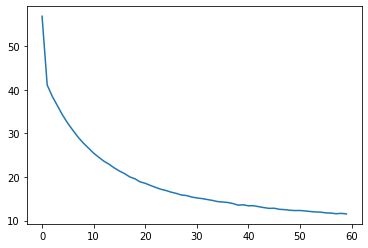

In [7]:
# Plot the evolution of the loss
plt.plot(J)

In [8]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    h = tf.maximum(tf.matmul(x, w1) + b1, 0)
    y_pred = tf.sigmoid(tf.matmul(h,w2) + b2)
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [9]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1278 - accuracy: 0.2201
Epoch 2/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0779 - accuracy: 0.5598
Epoch 3/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.6725
Epoch 4/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0549 - accuracy: 0.7296
Epoch 5/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0480 - accuracy: 0.7827
Ep

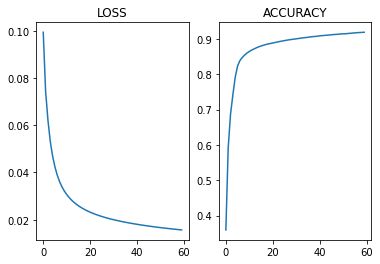

In [14]:
# Model building with keras

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(H, input_shape=(D,),use_bias=True, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, use_bias=True, activation='sigmoid'))

model.summary()

# Model training
sgd = tf.keras.optimizers.SGD(learning_rate=A)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
                    
start_time_keras = time.time()
hist = model.fit(x_train, y_train, epochs=E)
end_time_keras = time.time()

fig, ax = plt.subplots(1, 2)

ax[0].plot(hist.history['loss'])
ax[0].set_title("LOSS")
ax[1].plot(hist.history['accuracy'])
ax[1].set_title("ACCURACY")

plt.show()

In [15]:
print("MANUAL RESULTS")
print('# samples     : ', N_test)
print('accuracy      :  %2.2f %%'% (accuracy*100.0))
print('loss          :  %2.2f'% (J_epoch))
print('learning time : % 2.2f s\n'% ((end_time_manual-start_time_manual)))

print("KERAS RESULTS")
result = model.evaluate(x_test, y_test, verbose=0)
print('# samples     : ', y_test.shape[0])
print('accuracy      :  %2.2f %%'% (result[1]*100.0))
print('loss          :  %2.2f'% (result[0]*100.0))
print('learning time : % 2.2f s'% ((end_time_keras-start_time_keras)))

MANUAL RESULTS
# samples     :  10000
accuracy      :  88.78 %
loss          :  11.51
learning time :  375.36 s

KERAS RESULTS
# samples     :  10000
accuracy      :  92.27 %
loss          :  1.49
learning time :  499.27 s


## Manual results
- number of samples  : 10000
- accuracy           : 89.20 % (-> error rate : 10.80 %)
- loss               : 11.51
- learning time      : 375 s
    
## Keras results
- number of samples  : 10000
- accuracy           : 92.20 %
- loss               : 1.51
- learning time      : 255 s

## Comments
After both learnings, we can see that the accuracy of the model built and trained with keras has a better accuracy the the model build with low-level tf functions. Furthermore, using the same number of epochs (60), the learning time is 30% smaller when using keras than when using low-level tf functions.
The implementation is also (a lot) simpler, consisting in a bunch of lines of code, where a low level implementation requires up to 30 lines of code.